In [1]:
#Importing packages
import pandas as pd
import sklearn
import nltk
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction import text
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.stem import WordNetLemmatizer
import os
from sklearn import svm
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import pyLDAvis
import pyLDAvis.gensim
import warnings

In [13]:
warnings.filterwarnings('ignore')

In [2]:
#Import the data frame
mtg = pd.read_csv("MTG_Cards")
mtg = mtg.drop(columns = "Unnamed: 0")
mtg

,Name,Text,Flavor,Color,Cost,Type,Rarity
0,+2 Mace,Equipped creature gets +2/+2 Equip {3} {3}: At...,The weight of this magic weapon falls heavy on...,White,{1}{W},Artifact — Equipment,common
1,Abbey Gargoyles,Flying protection from red,Though Serra has not been seen for twenty year...,White,{2}{W}{W}{W},Creature — Gargoyle,uncommon
2,Abbey Griffin,Flying vigilance,The darkness crawls with vampires and ghouls b...,White,{3}{W},Creature — Griffin,common
3,Abbey Matron,{W} {T}: Abbey Matron gets +0/+3 until end of ...,The Matrons are kindly souls but don t ask one...,White,{2}{W},Creature — Human Cleric,common
4,Abeyance,Until end of turn target player can t cast ins...,I m too modest a wizard to reveal the full ext...,White,{1}{W},Instant,rare
...,...,...,...,...,...,...,...
12039,Wolf's Quarry,Create three 1/1 green Boar creature tokens wi...,The monster was gaining on them Twice it had f...,Green,{4}{G}{G},Sorcery,common
12040,Wolf Strike,Target creature you control gets +2/+0 until e...,Tovolar s howlpack had scattered but the Dire ...,Green,{2}{G},Instant,common
12041,Wolverine Pack,Rampage 2 Whenever this creature becomes block...,Give them great meals of beef and iron and ste...,Green,{2}{G}{G},Creature — Wolverine,uncommon
12042,Wolverine Riders,At the beginning of each upkeep create a 1/1 g...,We ll break their lines The rest of you follow,Green,{4}{G}{G},Creature — Elf Warrior,rare


In [3]:
AllFlavorTexts = []

for entry in mtg["Flavor"]:
    AllFlavorTexts.append(entry)

In [4]:
print(AllFlavorTexts[:5])

['The weight of this magic weapon falls heavy on the wicked', 'Though Serra has not been seen for twenty years her gargoyles still watch over our city and punish the guilty —Gulsen abbey matron', 'The darkness crawls with vampires and ghouls but we are not without allies —Mikaeus the Lunarch', 'The Matrons are kindly souls but don t ask one for an ale —Halina Dwarven Trader', 'I m too modest a wizard to reveal the full extent of my abilities —Ertai wizard adept']


In [7]:
#Cleaning the text
CleanAllFlavorTexts = []

for text in AllFlavorTexts:

    text=text.lower()
    text=re.sub(r'[,:.\+;@#?!&$\-\\{\}\\\/\']+', ' ', text, flags=re.IGNORECASE)
    text=re.sub(' +', ' ', text, flags=re.IGNORECASE)
    text=re.sub(r'\"', ' ', text, flags=re.IGNORECASE)
    text=re.sub(r'[^a-zA-Z]', " ", text, flags=re.VERBOSE)
    text=text.replace(',', '')
    text=' '.join(text.split())
    text=re.sub("\n|\r", "", text) 
    text = ' '.join([wd for wd in text.split() if len(wd)>2])
    
    CleanAllFlavorTexts.append(text)

In [8]:
print(CleanAllFlavorTexts[:5])

['the weight this magic weapon falls heavy the wicked', 'though serra has not been seen for twenty years her gargoyles still watch over our city and punish the guilty gulsen abbey matron', 'the darkness crawls with vampires and ghouls but are not without allies mikaeus the lunarch', 'the matrons are kindly souls but don ask one for ale halina dwarven trader', 'too modest wizard reveal the full extent abilities ertai wizard adept']


In [9]:
## Word Clouds ##

In [10]:
#Defining a function that turns a list of strings into a single string
def listToString(x):
 
    #Initialize an empty string that will contain the output of the function
    string = " "
 
    #Create a single string by joining together the multiple elements of the input list
    return (string.join(x))

In [11]:
AllFlavor_forWC = listToString(CleanAllFlavorTexts)

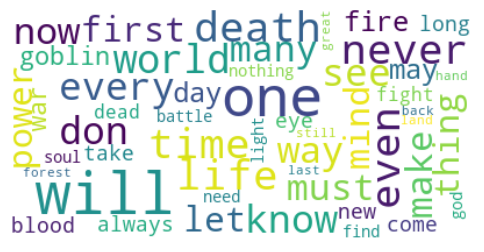

In [93]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
#Collocations is false to not include commonly seen together phrases, just looking at words
all_flavor_wordcloud = WordCloud(width = 400, height = 200, max_font_size=50, max_words=50, background_color="white", 
                                min_word_length = 3, collocations = False).generate(AllFlavor_forWC)
plt.figure(figsize = (6,6))
plt.imshow(all_flavor_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
WhiteFlavorTexts = []

for entry in mtg[mtg["Color"] == "White"]["Flavor"]:
    WhiteFlavorTexts.append(entry)

In [18]:
#Cleaning the text
CleanWhiteFlavorTexts = []

for text in WhiteFlavorTexts:

    text=text.lower()
    text=re.sub(r'[,:.\+;@#?!&$\-\\{\}\\\/\']+', ' ', text, flags=re.IGNORECASE)
    text=re.sub(' +', ' ', text, flags=re.IGNORECASE)
    text=re.sub(r'\"', ' ', text, flags=re.IGNORECASE)
    text=re.sub(r'[^a-zA-Z]', " ", text, flags=re.VERBOSE)
    text=text.replace(',', '')
    text=' '.join(text.split())
    text=re.sub("\n|\r", "", text) 
    text = ' '.join([wd for wd in text.split() if len(wd)>2])
    
    CleanWhiteFlavorTexts.append(text)

In [19]:
WhiteFlavor_forWC = listToString(CleanWhiteFlavorTexts)

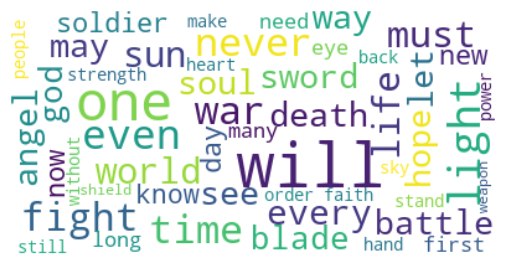

In [94]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
#Collocations is false to not include commonly seen together phrases, just looking at words
white_flavor_wordcloud = WordCloud(width = 400, height = 200, max_font_size=50, max_words=50, background_color="white", 
                                min_word_length = 3, collocations = False).generate(WhiteFlavor_forWC)
plt.figure()
plt.imshow(white_flavor_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
RedFlavorTexts = []

for entry in mtg[mtg["Color"] == "Red"]["Flavor"]:
    RedFlavorTexts.append(entry)

In [31]:
#Cleaning the text
CleanRedFlavorTexts = []

for text in RedFlavorTexts:

    text=text.lower()
    text=re.sub(r'[,:.\+;@#?!&$\-\\{\}\\\/\']+', ' ', text, flags=re.IGNORECASE)
    text=re.sub(' +', ' ', text, flags=re.IGNORECASE)
    text=re.sub(r'\"', ' ', text, flags=re.IGNORECASE)
    text=re.sub(r'[^a-zA-Z]', " ", text, flags=re.VERBOSE)
    text=text.replace(',', '')
    text=' '.join(text.split())
    text=re.sub("\n|\r", "", text) 
    text = ' '.join([wd for wd in text.split() if len(wd)>2])
    
    CleanRedFlavorTexts.append(text)

In [32]:
RedFlavor_forWC = listToString(CleanRedFlavorTexts)

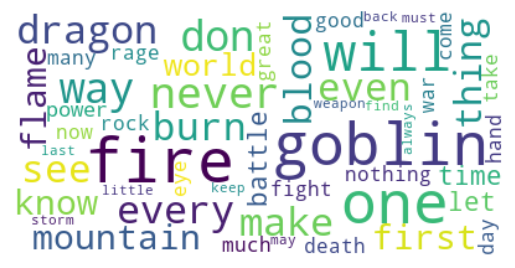

In [95]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
#Collocations is false to not include commonly seen together phrases, just looking at words
red_flavor_wordcloud = WordCloud(width = 400, height = 200, max_font_size=50, max_words=50, background_color="white", 
                                min_word_length = 3, collocations = False).generate(RedFlavor_forWC)
plt.figure()
plt.imshow(red_flavor_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
BlueFlavorTexts = []

for entry in mtg[mtg["Color"] == "Blue"]["Flavor"]:
    BlueFlavorTexts.append(entry)

In [35]:
#Cleaning the text
CleanBlueFlavorTexts = []

for text in BlueFlavorTexts:

    text=text.lower()
    text=re.sub(r'[,:.\+;@#?!&$\-\\{\}\\\/\']+', ' ', text, flags=re.IGNORECASE)
    text=re.sub(' +', ' ', text, flags=re.IGNORECASE)
    text=re.sub(r'\"', ' ', text, flags=re.IGNORECASE)
    text=re.sub(r'[^a-zA-Z]', " ", text, flags=re.VERBOSE)
    text=text.replace(',', '')
    text=' '.join(text.split())
    text=re.sub("\n|\r", "", text) 
    text = ' '.join([wd for wd in text.split() if len(wd)>2])
    
    CleanBlueFlavorTexts.append(text)

In [36]:
BlueFlavor_forWC = listToString(CleanBlueFlavorTexts)

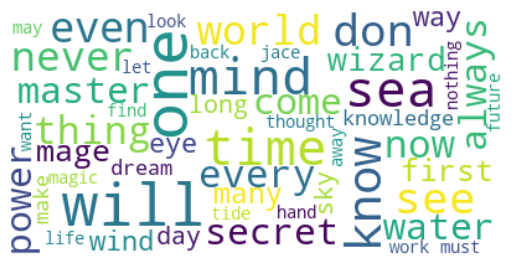

In [96]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
#Collocations is false to not include commonly seen together phrases, just looking at words
blue_flavor_wordcloud = WordCloud(width = 400, height = 200, max_font_size=50, max_words=50, background_color="white", 
                                min_word_length = 3, collocations = False).generate(BlueFlavor_forWC)
plt.figure()
plt.imshow(blue_flavor_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [38]:
BlackFlavorTexts = []

for entry in mtg[mtg["Color"] == "Black"]["Flavor"]:
    BlackFlavorTexts.append(entry)

In [39]:
#Cleaning the text
CleanBlackFlavorTexts = []

for text in BlackFlavorTexts:

    text=text.lower()
    text=re.sub(r'[,:.\+;@#?!&$\-\\{\}\\\/\']+', ' ', text, flags=re.IGNORECASE)
    text=re.sub(' +', ' ', text, flags=re.IGNORECASE)
    text=re.sub(r'\"', ' ', text, flags=re.IGNORECASE)
    text=re.sub(r'[^a-zA-Z]', " ", text, flags=re.VERBOSE)
    text=text.replace(',', '')
    text=' '.join(text.split())
    text=re.sub("\n|\r", "", text) 
    text = ' '.join([wd for wd in text.split() if len(wd)>2])
    
    CleanBlackFlavorTexts.append(text)

In [40]:
BlackFlavor_forWC = listToString(CleanBlackFlavorTexts)

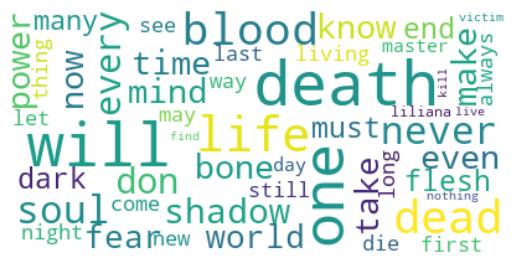

In [97]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
#Collocations is false to not include commonly seen together phrases, just looking at words
black_flavor_wordcloud = WordCloud(width = 400, height = 200, max_font_size=50, max_words=50, background_color="white", 
                                min_word_length = 3, collocations = False).generate(BlackFlavor_forWC)
plt.figure()
plt.imshow(black_flavor_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [42]:
GreenFlavorTexts = []

for entry in mtg[mtg["Color"] == "Green"]["Flavor"]:
    GreenFlavorTexts.append(entry)

In [43]:
#Cleaning the text
CleanGreenFlavorTexts = []

for text in GreenFlavorTexts:

    text=text.lower()
    text=re.sub(r'[,:.\+;@#?!&$\-\\{\}\\\/\']+', ' ', text, flags=re.IGNORECASE)
    text=re.sub(' +', ' ', text, flags=re.IGNORECASE)
    text=re.sub(r'\"', ' ', text, flags=re.IGNORECASE)
    text=re.sub(r'[^a-zA-Z]', " ", text, flags=re.VERBOSE)
    text=text.replace(',', '')
    text=' '.join(text.split())
    text=re.sub("\n|\r", "", text) 
    text = ' '.join([wd for wd in text.split() if len(wd)>2])
    
    CleanGreenFlavorTexts.append(text)

In [44]:
GreenFlavor_forWC = listToString(CleanGreenFlavorTexts)

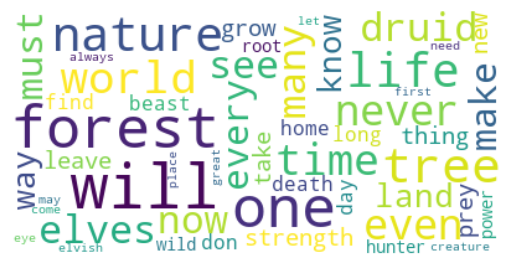

In [98]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
#Collocations is false to not include commonly seen together phrases, just looking at words
green_flavor_wordcloud = WordCloud(width = 400, height = 200, max_font_size=50, max_words=50, background_color="white", 
                                min_word_length = 3, collocations = False).generate(GreenFlavor_forWC)
plt.figure()
plt.imshow(green_flavor_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [46]:
## Initializing Vectorizers ##

In [66]:
CV_all = CountVectorizer(input = "content", stop_words = "english")

CV_white = CountVectorizer(input = "content", stop_words = "english")

CV_red = CountVectorizer(input = "content", stop_words = "english")

CV_black = CountVectorizer(input = "content", stop_words = "english")

CV_blue = CountVectorizer(input = "content", stop_words = "english")

CV_green = CountVectorizer(input = "content", stop_words = "english")

In [59]:
#Vectorizing the data and showing data frame
Vect_all = CV_all.fit_transform(CleanAllFlavorTexts)
FeatureNames_all = CV_all.get_feature_names_out()

DF_all = pd.DataFrame(Vect_all.toarray(), columns = FeatureNames_all)

In [60]:
DF_all

,aaaaaaaaah,aagh,aahhhhhhhhh,aaru,abaddon,abandon,abandoned,abandoning,abar,abated,...,zoologist,zubera,zul,zulaport,zunak,zuo,zur,zurdi,zurgo,zyd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#Instantiating and running LDA
LDA_all = LatentDirichletAllocation(n_components = 10, max_iter = 100, learning_method = "online", random_state = 99)
LDA_all_model = LDA_all.fit_transform(Vect_all)

In [63]:
#Function that will display topics and word lists found by LDA
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [64]:
display_topics(LDA_all, FeatureNames_all, 10)

Topic 0:
time fear fight forest hand strength true mage shall captain
Topic 1:
good dead things eyes place path thought creatures doesn past
Topic 2:
know power long want flesh kami war soul flame night
Topic 3:
left come heart earth single deep lightning dark tell weatherlight
Topic 4:
life way blood best thing dragons end eye follow saw
Topic 5:
just goblins make need think nature home did ground does
Topic 6:
great goblin day rage like lost enemy storm master rock
Topic 7:
new battle little world away use living magic city dragon
Topic 8:
don let sun land seen years die mountains live urza
Topic 9:
like death mind sky sea run better got face stand


In [67]:
#Vectorizing the data and showing data frame
Vect_white = CV_white.fit_transform(CleanWhiteFlavorTexts)
FeatureNames_white = CV_white.get_feature_names_out()

DF_white = pd.DataFrame(Vect_white.toarray(), columns = FeatureNames_white)

In [68]:
DF_white

,abandon,abandoned,abandoning,abbey,abbot,aberrant,aberrations,abilities,ability,ablate,...,zhalfir,zhalfirin,zhang,zhiada,zho,zhou,zilla,zither,zogye,zunak
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
#Instantiating and running LDA
LDA_white = LatentDirichletAllocation(n_components = 10, max_iter = 100, learning_method = "online", random_state = 99)
LDA_white_model = LDA_white.fit_transform(Vect_white)

In [70]:
display_topics(LDA_white, FeatureNames_white, 10)

Topic 0:
world faith sword like shield little let soldiers come truth
Topic 1:
place gerrard strike weatherlight righteous cause right free walk shields
Topic 2:
hope new soul best night don angel light just single
Topic 3:
time better general victory magic think watch big warriors hearts
Topic 4:
long know power blood life guard greater army law cho
Topic 5:
fight war peace kami follow home honor knights pride trained
Topic 6:
need shall protect wings thousand light city gideon enemy lives
Topic 7:
sun battle stand great heart strength spirits stone rise win
Topic 8:
life day way lost god die did live healing let
Topic 9:
death light eyes good darkness make leonin fear sky souls


In [71]:
#Vectorizing the data and showing data frame
Vect_red = CV_red.fit_transform(CleanRedFlavorTexts)
FeatureNames_red = CV_red.get_feature_names_out()

DF_red = pd.DataFrame(Vect_red.toarray(), columns = FeatureNames_red)

In [72]:
DF_red

,aaaaaaaaah,abandon,abandoned,abar,abattoir,abhorrent,ability,ablaze,able,aboard,...,zendikar,zerrins,zhalfir,zhalfirin,zhou,zhuo,ziatora,zombie,zone,zyd
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#Instantiating and running LDA
LDA_red = LatentDirichletAllocation(n_components = 10, max_iter = 100, learning_method = "online", random_state = 99)
LDA_red_model = LDA_red.fit_transform(Vect_red)

In [74]:
display_topics(LDA_red, FeatureNames_red, 10)

Topic 0:
way chandra just nalaar face living turn rest gone moment
Topic 1:
power good great make time death rage mountains life rock
Topic 2:
dragon fear battle far flesh weapons hard hands blade army
Topic 3:
goblin thing did best purphoros single gets magic small years
Topic 4:
like flame just think war strength place head got heat
Topic 5:
new sky spark shiv fires red ones past battle thousand
Topic 6:
let left burning right master horns old true seen ways
Topic 7:
burn day path ground stand lightning metal live prey ogre
Topic 8:
world things stone giant land mountain weapon god close glory
Topic 9:
goblins don know people come end goblin fight better blood


In [75]:
#Vectorizing the data and showing data frame
Vect_black = CV_black.fit_transform(CleanBlackFlavorTexts)
FeatureNames_black = CV_black.get_feature_names_out()

DF_black = pd.DataFrame(Vect_black.toarray(), columns = FeatureNames_black)

In [76]:
DF_black

,aaru,abaddon,abandon,abandoned,abandoning,ability,able,aboard,abominable,abomination,...,zhou,zol,zombie,zombies,zoo,zoologist,zul,zulaport,zur,zurgo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#Instantiating and running LDA
LDA_black = LatentDirichletAllocation(n_components = 10, max_iter = 100, learning_method = "online", random_state = 99)
LDA_black_model = LDA_black.fit_transform(Vect_black)

In [78]:
display_topics(LDA_black, FeatureNames_black, 10)

Topic 0:
blood way end hear lost shall rats feel lives like
Topic 1:
phyrexia bone city fight say head steel voldaren olivia thought
Topic 2:
dark flesh hunger come breath like death greatest victims help
Topic 3:
soul shadow curse touch memory crovax angel whispers quickly accept
Topic 4:
just power world dead away let great war dreams die
Topic 5:
life lord urborg long magic weak price remains family body
Topic 6:
don know liliana make day doesn vess good need plague
Topic 7:
think pain evil form feed death braids army dead live
Topic 8:
mind fear cabal death bones necromancer new god like just
Topic 9:
death life dead living kill time fall darkness left night


In [79]:
#Vectorizing the data and showing data frame
Vect_blue = CV_blue.fit_transform(CleanBlueFlavorTexts)
FeatureNames_blue = CV_blue.get_feature_names_out()

DF_blue = pd.DataFrame(Vect_blue.toarray(), columns = FeatureNames_blue)

In [80]:
DF_blue

,abandon,abandoned,aberrant,abhorrent,ability,able,aboard,abomination,aboshan,abral,...,zilan,zimone,zing,zok,zombie,zone,zoo,zubera,zur,zurdi
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#Instantiating and running LDA
LDA_blue = LatentDirichletAllocation(n_components = 10, max_iter = 100, learning_method = "online", random_state = 99)
LDA_blue_model = LDA_blue.fit_transform(Vect_blue)

In [82]:
display_topics(LDA_blue, FeatureNames_blue, 10)

Topic 0:
like know best way mage great need make vedalken didn
Topic 1:
time don world eyes river wind air thassa kami teferi
Topic 2:
sea sky say better clouds right people knowledge god place
Topic 3:
power work knew enemy fear tazeem archmage world unseen tides
Topic 4:
water land drakes isn long hold learn ice bound dead
Topic 5:
magic home true wisdom tide captain fly took minds comes
Topic 6:
mind just life away jace come little thing truth beleren
Topic 7:
master good storm future run change living today wind hand
Topic 8:
wizard secrets let new just lost spell won free ertai
Topic 9:
things day war moment hide weatherlight dream face secret past


In [83]:
#Vectorizing the data and showing data frame
Vect_green = CV_green.fit_transform(CleanGreenFlavorTexts)
FeatureNames_green = CV_green.get_feature_names_out()

DF_green = pd.DataFrame(Vect_green.toarray(), columns = FeatureNames_green)

In [84]:
DF_green

,aagh,aahhhhhhhhh,abandon,abandoned,abated,abbey,aberrations,abhors,ability,able,...,zhou,zhurong,zija,zombie,zombies,zoo,zoologist,zuo,zurdi,zyd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
#Instantiating and running LDA
LDA_green = LatentDirichletAllocation(n_components = 10, max_iter = 100, learning_method = "online", random_state = 99)
LDA_green_model = LDA_green.fit_transform(Vect_green)

In [86]:
display_topics(LDA_green, FeatureNames_green, 10)

Topic 0:
forest know land day left leaves roots die blood light
Topic 1:
life death don sun true past air live eldrazi druid
Topic 2:
nature elvish grow think hunt heart tales meaning won wake
Topic 3:
bang krosa makes territory saying herd stone fruit slivers faster
Topic 4:
new shall night best born need strength jungle eat wild
Topic 5:
like trees great hunter place elder druid make living battle
Topic 6:
long things llanowar druids good flesh song time years want
Topic 7:
just prey strength tree away times forest does elves did
Topic 8:
world power way earth ancient nature natural beneath gaea grows
Topic 9:
elves forest home fight kami war run wilds leave path
